# Air Quality Prediction and Interpretation

## Introduction

Air pollution poses significant health risks and environmental challenges globally. Accurately predicting air quality can help in mitigating these risks by enabling proactive measures. This project focuses on developing predictive models to forecast air pollutant concentrations using the UCI Air Quality dataset.

**Objective:**
- To build predictive models for air quality indices.
- To interpret the key factors affecting air pollution levels.

**Dataset Description:**
The dataset comprises hourly averaged responses from an array of gas sensors deployed in an Italian city. It includes concentrations of various pollutants such as CO, NMHC, C6H6, NOx, and NO2, along with meteorological data like temperature and humidity.


**Benefits to Stakeholders:**
- **Environmental Agencies:** Improved forecasting for air quality alerts.
- **Public Health Officials:** Data-driven decisions to protect public health.
- **Urban Planners:** Insights for designing pollution mitigation strategies.

https://archive.ics.uci.edu/dataset/360/air+quality

Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [3]:
file_path = r'C:\Users\Hazem\OneDrive\Desktop\Docs all\Machine Learning\Labs\air+quality\AirQualityUCI.csv'

In [4]:
df = pd.read_csv(file_path, sep=';', decimal=',', na_values=-200)

In [5]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


checking Unnamed columns

In [7]:
print(df[['Unnamed: 15','Unnamed: 16']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 15  0 non-null      float64
 1   Unnamed: 16  0 non-null      float64
dtypes: float64(2)
memory usage: 148.1 KB
None


In [9]:
print(df[['Unnamed: 15','Unnamed: 16']].isnull().sum())

Unnamed: 15    9471
Unnamed: 16    9471
dtype: int64


checking column names

In [10]:
print(df.columns.tolist())

['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16']


Removing Leading Tailing Space (if found)

In [12]:
print(df.columns.str.strip())

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


In [13]:
print(df.columns.tolist())


['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16']


In [15]:
df=df.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

In [16]:
print(df.columns.tolist())


['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [20]:
df.shape

(9471, 15)

In [21]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.453252,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


Calculate missing Values


In [24]:
print(df.isnull().sum())

Date              114
Time              114
CO(GT)           1797
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
dtype: int64


In [28]:
print((df.isnull().sum()/len(df))*100)

Date              1.203674
Time              1.203674
CO(GT)           18.973709
PT08.S1(CO)       5.068103
NMHC(GT)         90.349488
C6H6(GT)          5.068103
PT08.S2(NMHC)     5.068103
NOx(GT)          18.509133
PT08.S3(NOx)      5.068103
NO2(GT)          18.540809
PT08.S4(NO2)      5.068103
PT08.S5(O3)       5.068103
T                 5.068103
RH                5.068103
AH                5.068103
dtype: float64


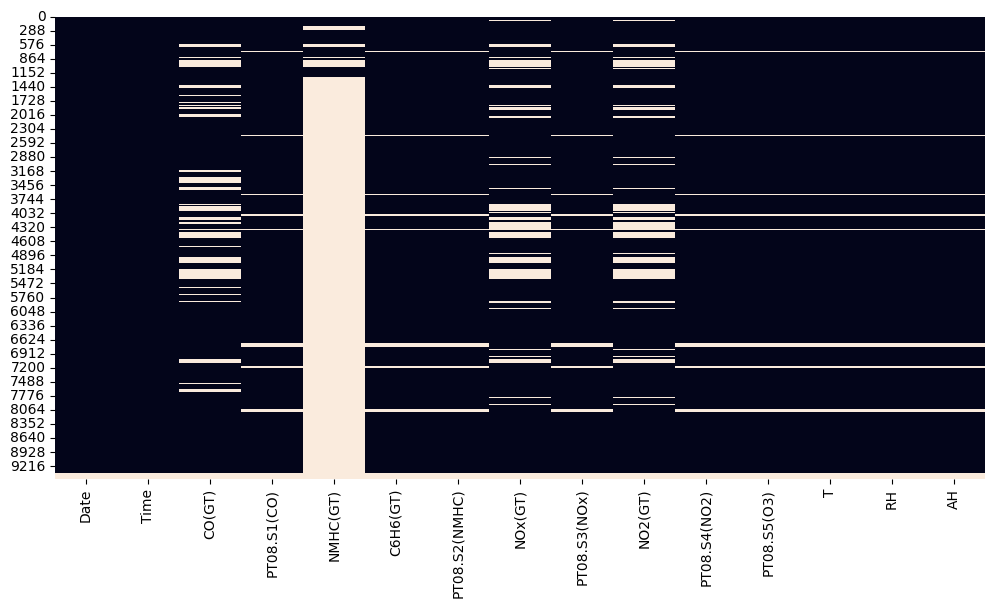

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

**Deciding what to do with the missing values:**

- Since Column MNHC(GT) has 90% missing values we'll drop it
- Column Date or Time missing 1.20% is relatively low we'll drop null rows
- Columns PT08.S1(CO), C6H6(GT), PT08.S2(NMHC), PT08.S3(NOx), PT08.S4(NO2), PT08.S5(O3), T, RH, AH has aprox 5% missing data we'll Impute the missing values usnig mean, since the data is continuous
- Columns CO(GT), NOx(GT), NO2(GT) has around 18% to 19% missing data, can be imputed however it can introduce bias, so we'll drop null rows.

In [29]:
df=df.drop(columns=['NMHC(GT)'])
df=df.dropna(subset=['Date', 'Time'])
df=df.dropna(subset=['CO(GT)','NOx(GT)','NO2(GT)'])

In [31]:
columns_to_impute = ['PT08.S1(CO)','C6H6(GT)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
for col in columns_to_impute:
    df[col]=df[col].fillna(df[col].mean())

check after cleaning

In [32]:
print(df.isnull().sum())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


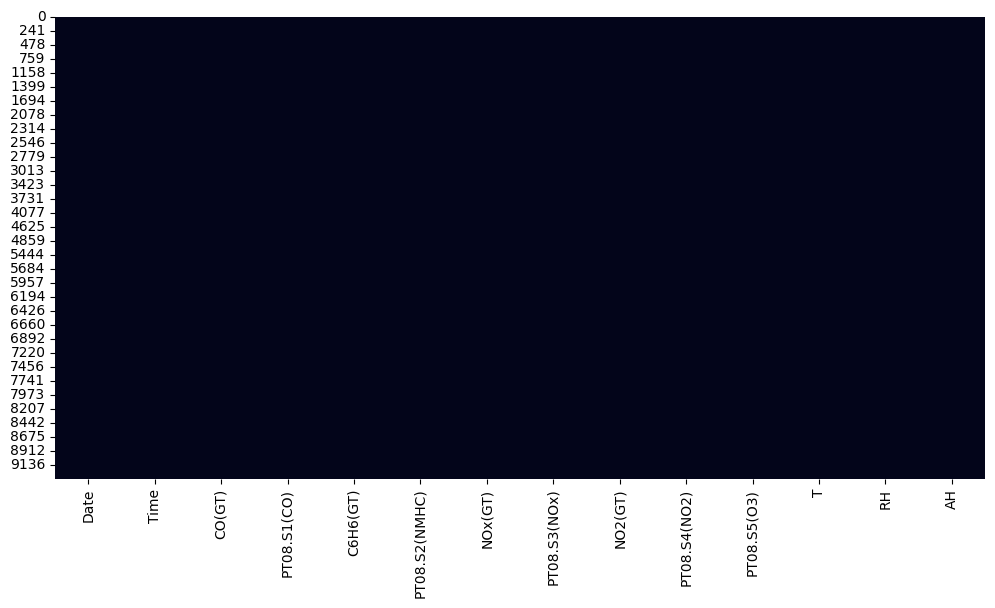

In [33]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [34]:
print('DataFrame shape after cleaning:', df.shape)

DataFrame shape after cleaning: (7258, 14)


In [35]:
print(df.describe())

            CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  7258.000000  7258.000000  7258.000000    7258.000000  7258.000000   
mean      2.205635  1119.913269    10.554488     958.543005   255.360292   
std       1.458299   213.903051     7.300358     258.223386   215.379615   
min       0.100000   647.000000     0.200000     390.000000     2.000000   
25%       1.100000   963.000000     5.100000     769.000000   103.000000   
50%       1.900000  1097.000000     9.200000     946.000000   188.000000   
75%       2.900000  1246.000000    14.300000    1125.000000   339.750000   
max      11.900000  2040.000000    63.700000    2214.000000  1479.000000   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   7258.000000  7258.000000   7258.000000  7258.000000  7258.000000   
mean     816.893387   114.811932   1452.648898  1057.756519    17.755323   
std      246.334088    48.244092    345.498963   397.532245     8.649570   
min      32

### Great!, Cleaning Done, First Part resolving nulls is done, next part we'll see if we could make some data manupilation.